
海龟交易法
初始资金1000万

1.交易标的
沪深300指数

2.开仓
- 多头：突破过去20日最高价[收盘价]
- 空头：突破过去20日最低价[收盘价]
- 仓位：总资金 * (20/10000) / N

* 备注：
 （1）一般海龟开仓用总资金的1%[100BP]为一个头寸单位, 这里为了演示加仓效果，20BP作为一个头寸单位。
 （2）使用ATR代替N, ATR=近20日TR的平均值

3.加仓
- 加仓：开仓后向有利方向移动0.5倍ATR(20日)

4.止盈止损
- 多头：
   （1）突破过去20日最低价
   （2）每次建仓、加仓信号, 移动止损线，向不利方向移动2倍ATR止损
- 空头
   （1）突破过去20日最高价
   （2）每次建仓、加仓信号, 移动止损线，向不利方向移动2倍ATR止损。


In [1]:
# 导入海龟交易法回测类
from turtle import *

In [2]:
# 定义日志
import logging
logging.basicConfig(format='%(asctime)s -%(levelname)s: %(message)s',
                    level=logging.INFO)

# 定义回测参数
params = {
    # 开始时间
    "start_date": "2022-04-01",
    # 截止时间
    "end_date": "2022-06-30",
    "init_cash":1000000,
    "window":20,
    "security": "000300.XSHG"
}

# 开始回测
bt = Backtest(params)
bt.run()

2023-03-28 22:09:12,084 -INFO: Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2023-03-28 22:09:12,085 -INFO: NumExpr defaulting to 8 threads.


13920


In [3]:
# 输出文件

import pandas as pd 
# 输出交易记录
trade = pd.DataFrame(bt.trades)
trade.to_csv("trade.csv",header=True, index=False)

# 输出每日资产

asset = [dict(date=s.date,available_cash=s.available_cash, total_value=s.total_value) for s in bt.settle_data]
asset = pd.DataFrame(asset)
asset.to_csv("asset.csv",header=True, index=False)

# 输出每日持仓
position = [dict(s.position.__dict__,**{"date": s.date} )for s in bt.settle_data if s.position]
position = pd.DataFrame(position)
position.to_csv("position.csv",header=True, index=False)


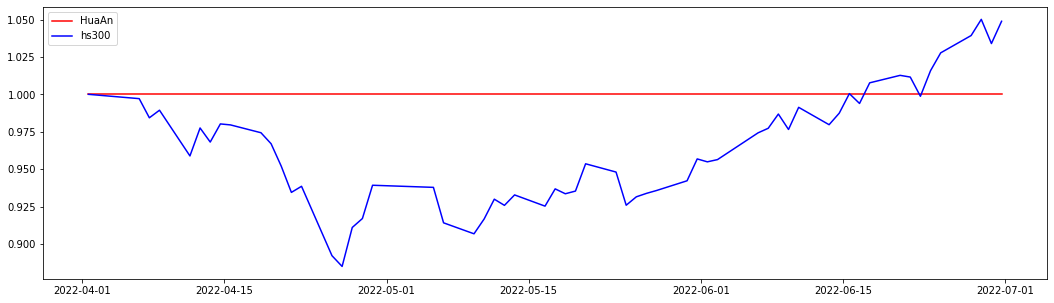

In [4]:
import matplotlib.pyplot as plt

date = asset["date"]
turtle = asset["total_value"]/asset.iloc[0]["total_value"]
hs300 = bt.history_data_day["close"]/bt.history_data_day.iloc[0]["close"]

plt.figure(figsize=(18, 5))
legend = ["HuaAn", "hs300"]

plt.plot(date, turtle, color="red", label=legend[0])
plt.plot(date,hs300, color="blue", label=legend[1])
plt.legend(legend)
plt.show()